# Loading the Reuters dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 16s 7us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

# Decoding newswires back to text

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 3s 5us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[0]

3

# Encoding the data

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [36]:
x_train 

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [17]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [18]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Model definition

In [19]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compiling the model

In [20]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Setting aside a validation set

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model

In [22]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 492us/step - loss: 2.6491 - accuracy: 0.5289 - val_loss: 1.7521 - val_accuracy: 0.6250
Epoch 2/20
7982/7982 [==============================] - 2s 281us/step - loss: 1.4305 - accuracy: 0.7033 - val_loss: 1.3229 - val_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 304us/step - loss: 1.0592 - accuracy: 0.7751 - val_loss: 1.1548 - val_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 2s 301us/step - loss: 0.8390 - accuracy: 0.8205 - val_loss: 1.0681 - val_accuracy: 0.7730
Epoch 5/20
7982/7982 [==============================] - 2s 292us/step - loss: 0.6671 - accuracy: 0.8574 - val_loss: 1.0125 - val_accuracy: 0.7890
Epoch 6/20
7982/7982 [==============================] - 2s 306us/step - loss: 0.5389 - accuracy: 0.8844 - val_loss: 0.9760 - val_accuracy: 0.7920
Epoch 7/20
7982/7982 [==============================] - 2s 311us/step - los

# Plotting the training and validation loss

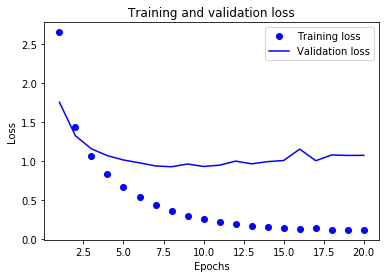

In [24]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Listing 3.20 Plotting the training and validation accuracy

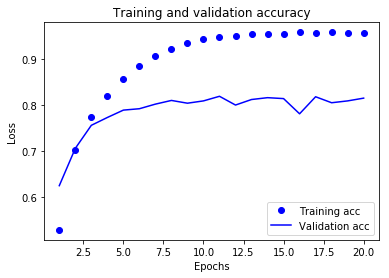

In [27]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Retraining a model from scratch

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 407us/step - loss: 2.7283 - accuracy: 0.5417 - val_loss: 1.8525 - val_accuracy: 0.6450
Epoch 2/9
7982/7982 [==============================] - 2s 302us/step - loss: 1.4485 - accuracy: 0.7169 - val_loss: 1.3235 - val_accuracy: 0.7170
Epoch 3/9
7982/7982 [==============================] - 2s 298us/step - loss: 1.0337 - accuracy: 0.7769 - val_loss: 1.1182 - val_accuracy: 0.7560
Epoch 4/9
7982/7982 [==============================] - 2s 297us/step - loss: 0.8061 - accuracy: 0.8270 - val_loss: 1.0105 - val_accuracy: 0.7870
Epoch 5/9
7982/7982 [==============================] - 3s 325us/step - loss: 0.6392 - accuracy: 0.8662 - val_loss: 0.9534 - val_accuracy: 0.7970
Epoch 6/9
7982/7982 [==============================] - 3s 397us/step - loss: 0.5095 - accuracy: 0.8943 - val_loss: 0.9391 - val_accuracy: 0.8080
Epoch 7/9
7982/7982 [==============================] - 2s 290us/step - loss: 0.411

In [29]:
 results

[0.9861427540239859, 0.7849510312080383]

In [30]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19278717720391808

# Generating predictions for new data

In [31]:
predictions = model.predict(x_test)

In [50]:
predictions[0]


array([1.2151333e-04, 8.2506733e-05, 9.9083882e-06, 6.8798846e-01,
       2.9180202e-01, 1.5397539e-04, 9.6131052e-06, 1.3136255e-04,
       2.9562963e-03, 7.8806939e-04, 2.1646338e-04, 9.4597554e-04,
       7.8110592e-05, 1.2603676e-04, 7.4782351e-05, 4.0523511e-05,
       9.4575773e-04, 9.8372213e-05, 2.9382232e-05, 6.3090422e-04,
       5.4105343e-03, 4.5577241e-03, 2.6888750e-04, 4.0297079e-04,
       1.9437786e-04, 7.6060103e-05, 1.1762216e-05, 1.9359188e-05,
       1.7381604e-05, 4.1603675e-05, 9.8645411e-05, 6.2860124e-04,
       1.2722125e-05, 3.5922303e-06, 2.9736222e-04, 7.9751553e-06,
       1.3510078e-04, 1.9886797e-05, 6.1390216e-05, 2.7440127e-04,
       5.2638006e-06, 4.3031641e-06, 4.0350301e-06, 2.0301552e-05,
       2.3593373e-05, 1.7210793e-04], dtype=float32)

In [32]:
predictions[0].shape

(46,)

In [46]:
 np.sum(predictions[0])

1.0

In [35]:
np.argmax(predictions[0])

3

# A different way to handle the labels and the loss

In [51]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [54]:
len(y_test)

2246

In [55]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

# A model with an information bottleneck

In [56]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 555us/step - loss: 2.7172 - accuracy: 0.3539 - val_loss: 1.8966 - val_accuracy: 0.6170
Epoch 2/20
7982/7982 [==============================] - 3s 354us/step - loss: 1.5899 - accuracy: 0.6492 - val_loss: 1.4458 - val_accuracy: 0.6500
Epoch 3/20
7982/7982 [==============================] - 3s 339us/step - loss: 1.2591 - accuracy: 0.6862 - val_loss: 1.3202 - val_accuracy: 0.6730
Epoch 4/20
7982/7982 [==============================] - 3s 359us/step - loss: 1.0952 - accuracy: 0.7238 - val_loss: 1.2779 - val_accuracy: 0.6970
Epoch 5/20
7982/7982 [==============================] - 3s 346us/step - loss: 0.9812 - accuracy: 0.7533 - val_loss: 1.2695 - val_accuracy: 0.6940
Epoch 6/20
7982/7982 [==============================] - 3s 356us/step - loss: 0.8921 - accuracy: 0.7766 - val_loss: 1.2527 - val_accuracy: 0.7020
Epoch 7/20
7982/7982 [==============================] - 3s 345us/step - loss